<a href="https://colab.research.google.com/github/MartinPdeS/PyMieSim/blob/master/PyMieSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build latest package version
============================


In [1]:
# !mkdir Project
# !rm -rf Project/PyMieSim
# !cd Project && git clone https://github.com/MartinPdeS/PyMieSim.git
# !cd Project/PyMieSim && git submodule init && git submodule update
# !python -m pip uninstall PyMieSim -y && cd Project/PyMieSim && cmake . && sudo make install && python -m pip install .

!python -m pip install PyMieSim --no-cache-dir --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.4/32.4 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 143.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 135.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 78.0 MB/s eta 0:00:00


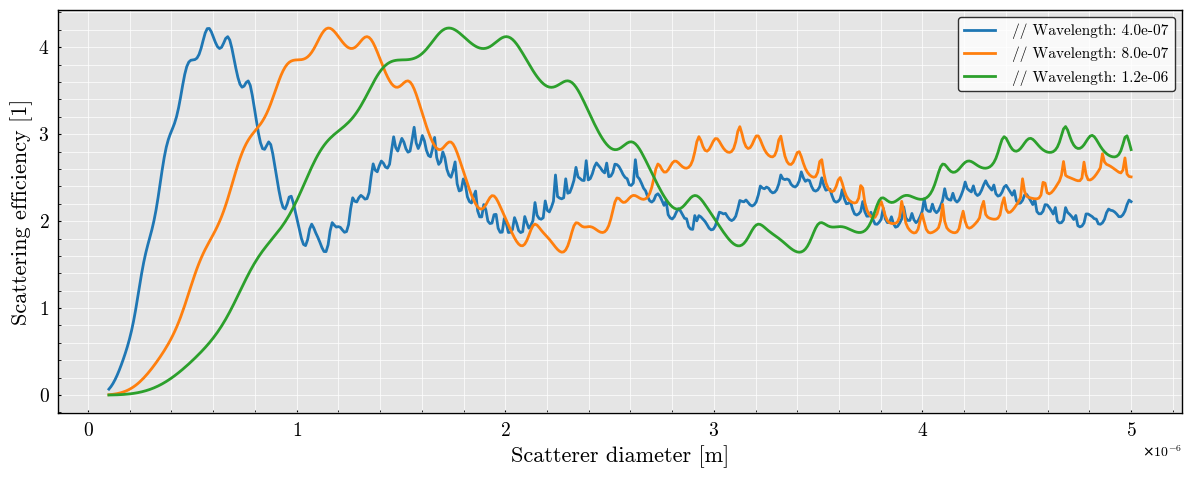

In [10]:
import numpy as np
from PyMieSim.experiment import SphereSet, SourceSet, PhotodiodeSet, Setup
from PyMieSim import measure

scatterer_set = SphereSet(
    diameter=np.linspace(100e-9, 5000e-9, 500),
    index=1.44,
    n_medium=1
)

source_set = SourceSet(
    wavelength=[400e-9, 800e-9, 1200e-9],
    linear_polarization=0,
    amplitude=1
)

setup = Setup(
    source_set=source_set,
    scatterer_set=scatterer_set,
    detector_set=None
)

DataSet = setup.Get(measure.Qsca)

figure = DataSet.plot(
    x=scatterer_set.diameter,
)

_ = figure.show()

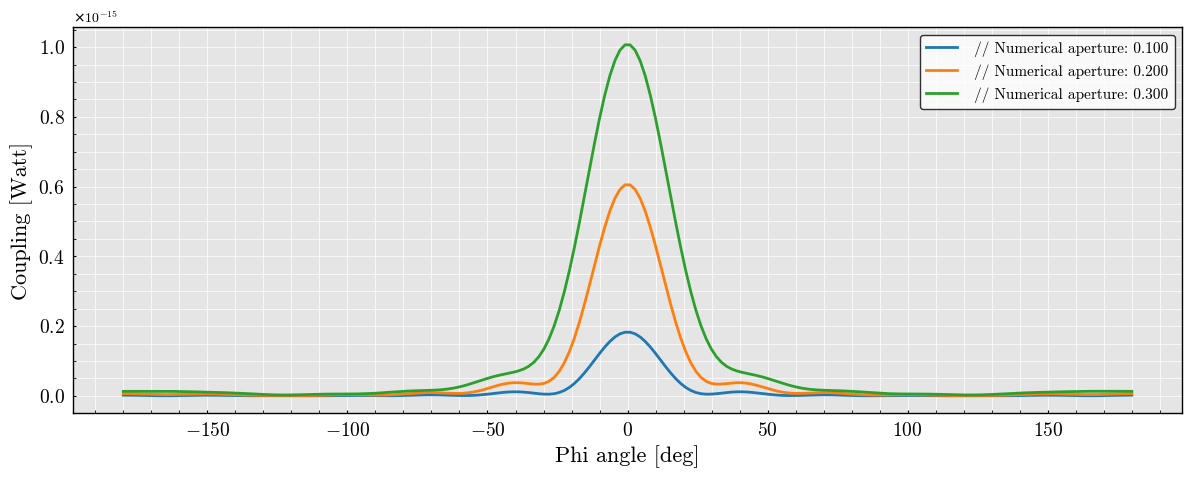

In [9]:
import numpy as np
from PyMieSim.experiment import SphereSet, SourceSet, PhotodiodeSet, Setup
from PyMieSim import measure

scatterer_set = SphereSet(
    diameter=800e-9,
    index=1.44,
    n_medium=1
)

source_set = SourceSet(
    wavelength=400e-9,
    linear_polarization=0,
    amplitude=1
)

detector_set = PhotodiodeSet(
    NA=[0.1, 0.2, 0.3],
    phi_offset=np.linspace(-180, 180, 200),
    gamma_offset=0,
    sampling=300,
    polarization_filter=None
)

setup = Setup(
    source_set=source_set,
    scatterer_set=scatterer_set,
    detector_set=detector_set
)

DataSet = setup.Get(measure.coupling)

figure = DataSet.plot(
    x=detector_set.phi_offset,
)
_ = figure.show()